In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

# For ploting
import matplotlib.pyplot as plt

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
import os
import numpy as np
from PIL import Image

# Define the dataset paths
base_path = "Indian-Traffic Sign-Dataset"
images_path = os.path.join(base_path, "Images_Merged")
labels_csv = os.path.join(base_path, "traffic_sign_updated.csv")

# Initialize data and labels
data = []
labels = []

# Define the number of classes (replace with your actual number of classes)
classes = 52  # Adjust based on your dataset

# Loop through each class folder
for i in range(classes):
    path = os.path.join(images_path, str(i))
    images = os.listdir(path)

    for image_file in images:
        try:
            image = Image.open(os.path.join(path, image_file))
            image = image.resize((32, 32))  
            image = image.convert('RGB')
            image = np.array(image)  # Convert to numpy array
            data.append(image)  # Append the image data
            labels.append(i)  # Append the corresponding label
        except Exception as e:
            print(f"Error loading image {image_file}: {e}")

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)



Data Splitting

In [3]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 52)
y_test = to_categorical(y_test, 52)

(13971, 32, 32, 3) (13971,)
(11176, 32, 32, 3) (2795, 32, 32, 3) (11176,) (2795,)


Model Building

In [4]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(52, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


c:\Users\ANJANA\OneDrive\Desktop\ANJANA\TrafficSignBoardProject\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 52)             │        13,364 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 359,252 (1.37 MB)

 Trainable params: 359,252 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 38s 83ms/step - accuracy: 0.0723 - loss: 5.8700 - val_accuracy: 0.3020 - val_loss: 2.8666
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.3106 - loss: 2.6691 - val_accuracy: 0.6215 - val_loss: 1.5654
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.4912 - loss: 1.9095 - val_accuracy: 0.6773 - val_loss: 1.2602
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 43s 76ms/step - accuracy: 0.5923 - loss: 1.4634 - val_accuracy: 0.7245 - val_loss: 1.0450
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 34s 97ms/step - accuracy: 0.6469 - loss: 1.2240 - val_accuracy: 0.7796 - val_loss: 0.8620
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.6899 - loss: 1.0907 - val_accuracy: 0.7778 - val_loss: 0.8390
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 56s 161ms/step - accuracy: 0.7251 - loss: 0.9605 - val_accuracy: 0.8229 - val_loss: 0.6862
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 76s 143ms/step - accuracy: 0.7359 - loss: 0.8974 

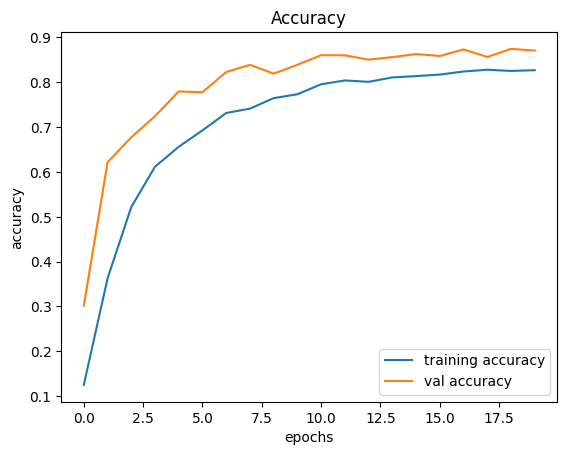

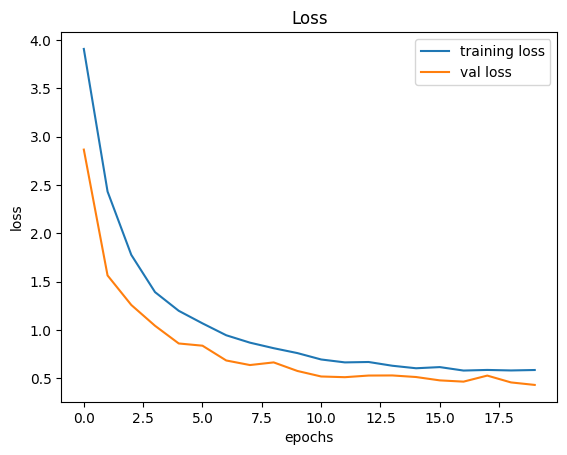

In [6]:
# Plotting performance graphs
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Display test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8713 - loss: 0.4397
Test Loss: 0.43341341614723206
Test Accuracy: 0.8708407878875732


In [8]:
# Predict class probabilities for test dataset
y_pred_probs = model.predict(X_test)

# Convert probabilities to class predictions
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot labels to class labels

# Display a few predictions
print("Predicted classes:", y_pred_classes[:10])
print("True classes:", y_test_classes[:10])


88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step
Predicted classes: [31 36  1 41 50 43 42 11 45 21]
True classes: [51 36  1 41 50 43 43 11 45 22]


In [9]:
import pandas as pd

# Load the class names from the CSV file
labels_csv = os.path.join(base_path, "traffic_sign_updated.csv")
class_map = pd.read_csv(labels_csv)

# Create a dictionary mapping ClassID to ClassName
id_to_classname = dict(zip(class_map['ClassId'], class_map['Name']))

# Predict class probabilities for test dataset
y_pred_probs = model.predict(X_test)

# Convert probabilities to class predictions (numerical)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot labels to class labels

# Map numerical predictions to class names
y_pred_classnames = [id_to_classname[class_id] for class_id in y_pred_classes]
y_test_classnames = [id_to_classname[class_id] for class_id in y_test_classes]

# Display some predictions with class names
print("Predicted class names:", y_pred_classnames[:10])
print("True class names:", y_test_classnames[:10])


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step
Predicted class names: ['No stopping', 'Refreshments', 'Bus stop', 'Staggered side road junction', 'Weight limit', 'Steep descent', 'Steep ascent', 'Horn prohibited', 'Telephone', 'No entry for bullock carts']
True class names: ['Y-junction', 'Refreshments', 'Bus stop', 'Staggered side road junction', 'Weight limit', 'Steep descent', 'Steep descent', 'Horn prohibited', 'Telephone', 'No entry for cycles']


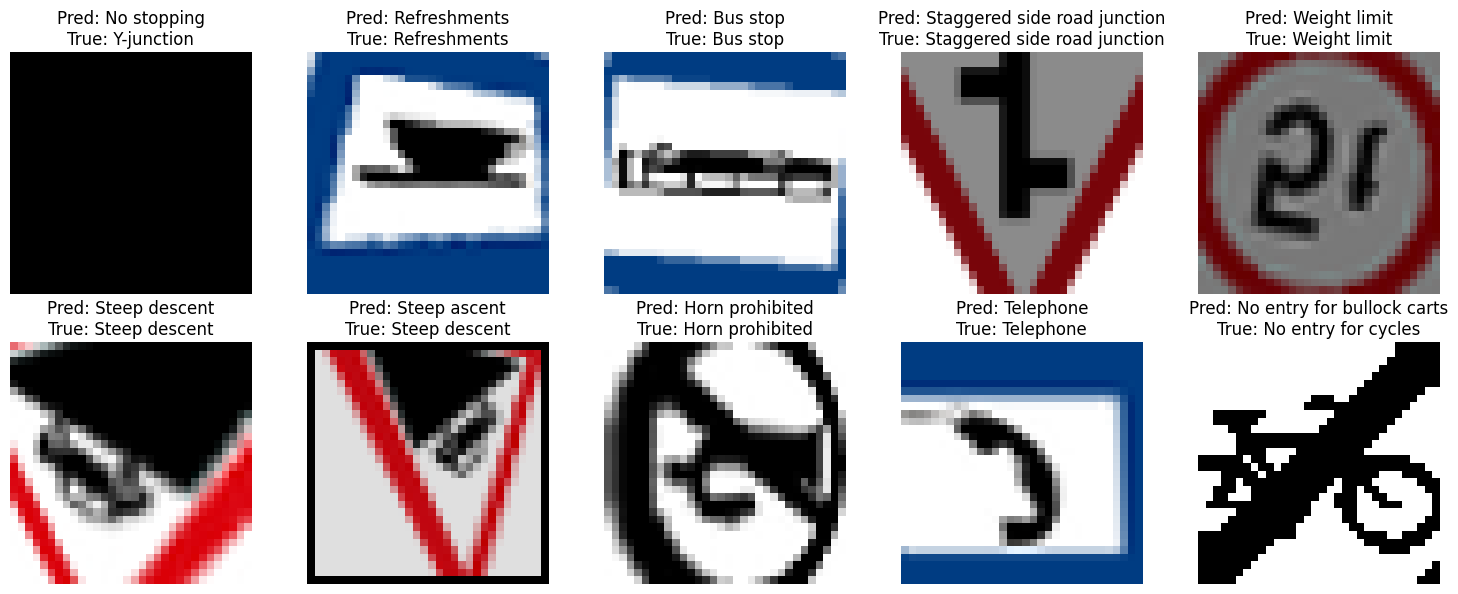

In [10]:
import matplotlib.pyplot as plt

# Visualize some test images with predicted and true class names
plt.figure(figsize=(15, 6))  # Adjust figsize (width, height) as needed

for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.imshow(X_test[i].astype('uint8'))  # Convert back to uint8 for display
    plt.title(f"Pred: {y_pred_classnames[i]}\nTrue: {y_test_classnames[i]}", fontsize=12)  # Adjust fontsize
    plt.axis('off')

plt.tight_layout()
plt.show()



In [11]:
# Saving the Model 
model.save('traffic_model.h5')